In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('stockmarket.csv')
df.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


In [3]:
import datetime
import calendar

def Date_trans(row):
    temp = row["Date"].split("-")
    temp[1] = list(calendar.month_abbr).index(temp[1])
    y = "-".join('%s' %id for id in temp)
    y = datetime.datetime.strptime(y, '%d-%m-%Y')
    return y

df["Date_T"] = df.apply (Date_trans , axis = 1)    

In [4]:
def Train_Test(row):
    y = row["Date_T"].year
    if y < 2018:
        return "T"
    else:
        return "F"

df["Train"] = df.apply (Train_Test , axis = 1)    

In [5]:
df['Train'].value_counts()

T    2264
F     252
Name: Train, dtype: int64

In [6]:
def ToStamp(row):
    y = datetime.datetime.timestamp(row["Date_T"])
    return y

df["Time"] = df.apply (ToStamp , axis = 1)           

In [7]:
def YearSep(row):
    y = row["Date_T"].year
    return y
    
def MonthSep(row):
    m = row["Date_T"].month
    return m
    
def DateSep(row):
    d = int(row["Date"].split("-")[0])
    return d
    
def QDecide(row):
    if row["Month"] <= 3:
        s = 1
    elif row["Month"] <= 6:
        s = 2
    elif row["Month"] <= 9:
        s = 3
    else:
        s = 4
    return s
        

df["Year"] = df.apply (YearSep , axis = 1)
df["Month"] = df.apply (MonthSep , axis = 1)
df["Day"] = df.apply (DateSep , axis = 1)
df["Q"] = df.apply (QDecide , axis = 1)

In [8]:
def Rise_Fall_P(row):
    P = (row["Close Price"]/row["Open Price"]-1)*100
    if P > 0:
        return 0 #"rise"
    elif P < 0:
        return 1 #"fall"
    else:
        return 2 #"same"
    return P

df["Diff"] = df.apply (Rise_Fall_P , axis = 1)

In [9]:
df.tail()

,Date,Open Price,Close Price,High Price,Low Price,Volume,Date_T,Train,Time,Year,Month,Day,Q,Diff
2511,24-Dec-2018,2400.56,2351.10,2410.34,2351.10,1662758784,2018-12-24,F,1.545581e+09,2018,12,24,4,1
2512,26-Dec-2018,2363.12,2467.70,2467.76,2346.58,2611875072,2018-12-26,F,1.545754e+09,2018,12,26,4,0
2513,27-Dec-2018,2442.50,2488.83,2489.10,2397.94,2386466304,2018-12-27,F,1.545840e+09,2018,12,27,4,0
2514,28-Dec-2018,2498.77,2485.74,2520.27,2472.89,2080726656,2018-12-28,F,1.545926e+09,2018,12,28,4,1
2515,31-Dec-2018,2498.94,2506.85,2509.24,2482.82,1912680064,2018-12-31,F,1.546186e+09,2018,12,31,4,0


In [10]:
Data = df.drop(["Date", "Close Price", "Date_T"], axis=1)
Data_train = Data[Data["Train"] == "T"].drop(["Train", "High Price", "Low Price", "Time"], axis=1)
Data_test = Data[Data["Train"] == "F"].drop(["Train", "High Price", "Low Price", "Time"], axis=1)

In [11]:
Data_train.head()

,Open Price,Volume,Year,Month,Day,Q,Diff
0,902.99,4048270080,2009,1,2,1,0
1,929.17,5413910016,2009,1,5,1,1
2,931.17,5392620032,2009,1,6,1,0
3,927.45,4704940032,2009,1,7,1,1
4,905.73,4991549952,2009,1,8,1,0


In [12]:
x_train = Data_train.loc[:, Data_train.columns != "Diff"].drop(["Year", "Day","Volume", "Q"], axis=1)
#x_train = Data_train[Data_train["Year"] == 2017].drop(["Year", "Day", "Diff", "Q", "Volume"], axis=1)
y_train = Data_train[["Diff"]]
#y_train = Data_train[Data_train["Year"] == 2017][["Diff"]]
#x_test = Data_test.loc[:, Data_test.columns != "Diff"]
x_test = Data_test[Data_test["Year"] == 2018].drop(["Year", "Day", "Diff", "Volume", "Q"], axis=1)
#y_test = Data_test[["Diff"]]
y_test = Data_test[Data_test["Year"] == 2018][["Diff"]]

In [13]:
x_train.head()

,Open Price,Month
0,902.99,1
1,929.17,1
2,931.17,1
3,927.45,1
4,905.73,1


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

C:\Programs\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [15]:
x_test_std

array([[ 2.11792884, -1.62034429],
       [ 2.14703114, -1.62034429],
       [ 2.19126169, -1.62034429],
       [ 2.21603575, -1.62034429],
       [ 2.23940827, -1.62034429],
       [ 2.25688614, -1.62034429],
       [ 2.24534415, -1.62034429],
       [ 2.26063729, -1.62034429],
       [ 2.2961083 , -1.62034429],
       [ 2.35542587, -1.62034429],
       [ 2.32663273, -1.62034429],
       [ 2.36251595, -1.62034429],
       [ 2.36292817, -1.62034429],
       [ 2.37644878, -1.62034429],
       [ 2.42980987, -1.62034429],
       [ 2.45118316, -1.62034429],
       [ 2.45287324, -1.62034429],
       [ 2.45542897, -1.62034429],
       [ 2.49613509, -1.62034429],
       [ 2.4250488 , -1.62034429],
       [ 2.42436865, -1.62034429],
       [ 2.39147398, -1.32838572],
       [ 2.37595413, -1.32838572],
       [ 2.23608995, -1.32838572],
       [ 1.9758181 , -1.32838572],
       [ 2.13280976, -1.32838572],
       [ 2.12056701, -1.32838572],
       [ 1.9490242 , -1.32838572],
       [ 2.0210998 ,

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [17]:
def my_kernel(X, Y):
    return np.dot(X, Y.T)
  
penalty = 0.05

svm = SVC(C=penalty, kernel="linear", probability=True)
svm.fit(x_train_std, y_train.values.ravel())
  
acc_rate = accuracy_score(y_test.values.ravel(), svm.predict(x_test_std)) * 100
print("Penalty = %.2f, Accuracy = %.2f %%" % (penalty, acc_rate))

Penalty = 0.05, Accuracy = 50.40 %


In [18]:
for i, sv in enumerate(zip(svm.support_, svm.support_vectors_)):
    if i < 5:
        print("Index: %s; Support vector: %s" % (sv[0], sv[1]))

Index: 0; Support vector: [-1.55230001 -1.62034429]
Index: 2; Support vector: [-1.49421907 -1.62034429]
Index: 4; Support vector: [-1.54665267 -1.62034429]
Index: 7; Support vector: [-1.62072751 -1.62034429]
Index: 9; Support vector: [-1.67802524 -1.62034429]


In [19]:
svm.n_support_

array([1029, 1027,    2])

In [20]:
print("The labels by model prediction : %s" % svm.predict(x_test_std))
print("Real labels in the testing set : %s" % y_test.values.ravel())

The labels by model prediction : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Real labels in the testing set : [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0
 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1
 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0
 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0
 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1
 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 

In [21]:
for prob in svm.predict_proba(x_test_std):
    print(["%.2f" % p for p in prob] )

['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']
['0.54', '0.46', '0.00']


In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c = ['red', 'blue', 'lightgreen'][idx],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            x_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            x_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(x_test[:, 0],
                    x_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [23]:
def plot_train_test(location, x, y):
  
    plt.subplot(1,2,location)

    plot_decision_regions(x, y, classifier=svm)
    if location == 1:
      plt.title("Training")
    elif location == 2:
      plt.title("Testing")
    plt.xlabel("Open Price")
    plt.ylabel("Month")
    plt.legend(loc='upper left')
    plt.tight_layout()

In [24]:
penalty = 0.05

svm = SVC(C=penalty, kernel="linear")
svm.fit(x_train, y_train['Diff'].values)

acc_train = accuracy_score(y_train['Diff'].values, svm.predict(x_train)) * 100
acc_test = accuracy_score(y_test['Diff'].values, svm.predict(x_test)) * 100
print("Penalty = %.2f, Train accuracy = %.2f %%, Test accuracy = %.2f %%" % (penalty, acc_train, acc_test))

Penalty = 0.05, Train accuracy = 54.55 %, Test accuracy = 50.40 %


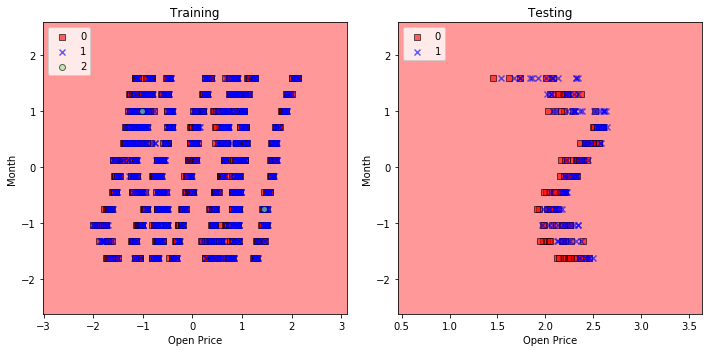

C: 0.05, Train Acc: 54.55 %, Test Acc: 50.40 %
Kernel function : linear


In [25]:
plt.figure(figsize=(10,5))

plot_train_test(1, x_train_std, y_train['Diff'].values)
plot_train_test(2, x_test_std, y_test['Diff'].values)

plt.show()

print("C: %.2f, Train Acc: %.2f %%, Test Acc: %.2f %%" % (penalty, acc_train, acc_test))
print("Kernel function : linear")

plt.figure(figsize=(10,5))

plot_train_test(1, x_train.values, y_train['Diff'].values)
plot_train_test(2, x_test.values, y_test['Diff'].values)

plt.show()

print("C: %.2f, Train Acc: %.2f %%, Test Acc: %.2f %%" % (penalty, acc_train, acc_test))
print("Kernel function : poly")